# Census Income Predictor

Project Team: Mariam Javed & Aman Hafez

For this project, we are given one of the following constraints: Sample, Feature or Algorithm. Based on the assigned constraint, we have to develop an income prediction model using the [1994 Census bureau](https://archive.ics.uci.edu/ml/datasets/adult) database by Ronny Kohavi and Barry Becker.

Constraints:

- Sample: Must use the 'cheap' train sample dataset
- Feature: Limit of 20 features (maximum)
- Algorithm: Must use Random Forest

## Problem Statement

Predict if a person's income is in excess of 50K given certain profile information, and more specifically to generate predicted probabilities of income being above 50K for each row in the test set. The constraint that our team was assigned was: the 'Feature' constraint where we must use the 'cheap' train sample dataset.

## Contents:

- [Data Imports and EDA](#Data-Imports-and-EDA)
- [Modelling: Training and Validation](#Modelling:-Training-and-Validation)
- [Modelling: Testing](#Modelling:-Testing)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

In [6]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## Data Imports and EDA

In [7]:
#sample constraint

In [8]:
df = pd.read_csv('./datasets/cheap_train_sample.csv')

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             6513 non-null   int64 
 1   workclass       6513 non-null   object
 2   fnlwgt          6513 non-null   int64 
 3   education       6513 non-null   object
 4   education-num   6513 non-null   int64 
 5   marital-status  6513 non-null   object
 6   occupation      6513 non-null   object
 7   relationship    6513 non-null   object
 8   sex             6513 non-null   object
 9   capital-gain    6513 non-null   int64 
 10  capital-loss    6513 non-null   int64 
 11  hours-per-week  6513 non-null   int64 
 12  native-country  6513 non-null   object
 13  wage            6513 non-null   object
dtypes: int64(6), object(8)
memory usage: 712.5+ KB


In [11]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,6513.000000,6.513000e+03,6513.000000,6513.000000,6513.000000,6513.000000
mean,38.529556,1.926640e+05,10.068478,1059.200829,92.108092,40.400891
std,13.684351,1.060173e+05,2.589238,7392.040587,413.710886,12.354685
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,27.000000,1.202380e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.815760e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.417530e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [13]:
df.shape

(6513, 14)

Look at the **categorical columns** and verify that we can convert the categorical columns into label encoding or one hot encoding. 

In [14]:
#our target variable wage is either <=50K or >50K
df['wage'].value_counts()

 <=50K    4945
 >50K     1568
Name: wage, dtype: int64

In [15]:
#convert to either 1 or 0
df['wage'] = df['wage'].map(lambda x: 1 if '>50K' in x else 0)

In [16]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,0
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,0
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,1
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,1
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,1
5,66,Private,284021,HS-grad,9,Widowed,Sales,Not-in-family,Female,0,0,40,United-States,0
6,30,Private,318749,Assoc-voc,11,Married-civ-spouse,Tech-support,Wife,Female,0,0,35,Germany,0
7,43,Private,456236,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,50,United-States,1
8,56,Private,244605,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,United-States,0
9,29,Private,137063,HS-grad,9,Never-married,Sales,Unmarried,Male,0,0,38,United-States,0


In [17]:
#workclass convert categorical variables to numbers:
df['workclass'].value_counts()

 Private             4545
 Self-emp-not-inc     504
 Local-gov            421
 ?                    363
 State-gov            262
 Self-emp-inc         225
 Federal-gov          189
 Without-pay            2
 Never-worked           2
Name: workclass, dtype: int64

In [18]:
#education categorical variables:
df['education'].value_counts()

 HS-grad         2103
 Some-college    1451
 Bachelors       1113
 Masters          334
 Assoc-voc        250
 11th             225
 Assoc-acdm       222
 10th             175
 7th-8th          142
 9th              106
 Prof-school      103
 12th              89
 Doctorate         81
 5th-6th           79
 1st-4th           27
 Preschool         13
Name: education, dtype: int64

In [19]:
#marital status
df['marital-status'].value_counts()

 Married-civ-spouse       2978
 Never-married            2135
 Divorced                  898
 Separated                 210
 Widowed                   204
 Married-spouse-absent      81
 Married-AF-spouse           7
Name: marital-status, dtype: int64

In [20]:
#occupation
df['occupation'].value_counts()

 Exec-managerial      853
 Prof-specialty       840
 Craft-repair         831
 Adm-clerical         761
 Other-service        684
 Sales                681
 Machine-op-inspct    377
 ?                    365
 Transport-moving     320
 Handlers-cleaners    268
 Farming-fishing      184
 Tech-support         182
 Protective-serv      129
 Priv-house-serv       36
 Armed-Forces           2
Name: occupation, dtype: int64

In [21]:
#relationship
df['relationship'].value_counts()

 Husband           2612
 Not-in-family     1665
 Own-child         1019
 Unmarried          701
 Wife               322
 Other-relative     194
Name: relationship, dtype: int64

In [22]:
#sex
df['sex'].value_counts()

 Male      4326
 Female    2187
Name: sex, dtype: int64

In [23]:
#native country
df['native-country'].value_counts()

 United-States                 5807
 Mexico                         150
 ?                              120
 Philippines                     43
 El-Salvador                     29
 Canada                          26
 Germany                         24
 Dominican-Republic              20
 Jamaica                         18
 South                           18
 Puerto-Rico                     17
 India                           17
 China                           17
 Cuba                            16
 England                         16
 Italy                           15
 Poland                          14
 Japan                           12
 Guatemala                       11
 Haiti                           11
 Columbia                        11
 Taiwan                          10
 Iran                            10
 France                           9
 Peru                             9
 Vietnam                          8
 Cambodia                         6
 Nicaragua                  

Workclass, Occupation and Native-country all have question marks in the data - let's use inferential imputation (mean/median/mode) to fill in these values:

In [24]:
df['workclass'].value_counts()

 Private             4545
 Self-emp-not-inc     504
 Local-gov            421
 ?                    363
 State-gov            262
 Self-emp-inc         225
 Federal-gov          189
 Without-pay            2
 Never-worked           2
Name: workclass, dtype: int64

In [25]:
df.loc[(df['workclass'] == ' ?')|(df['occupation'] == ' ?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
27,34,?,133861,HS-grad,9,Married-civ-spouse,?,Husband,Male,0,0,25,United-States,0
65,19,?,117201,HS-grad,9,Never-married,?,Own-child,Male,0,0,30,United-States,0
70,70,?,28471,9th,5,Widowed,?,Unmarried,Female,0,0,25,United-States,0
89,25,?,196627,11th,7,Never-married,?,Own-child,Male,0,0,40,United-States,0
91,18,?,97318,HS-grad,9,Never-married,?,Own-child,Female,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6401,24,?,175069,Bachelors,13,Never-married,?,Not-in-family,Male,0,0,50,United-States,0
6403,68,?,53850,7th-8th,4,Married-civ-spouse,?,Husband,Male,0,0,40,United-States,0
6475,21,?,405684,HS-grad,9,Never-married,?,Other-relative,Male,0,0,35,Mexico,0
6499,67,?,37092,7th-8th,4,Married-civ-spouse,?,Husband,Male,0,0,4,United-States,0


Interesting to note that all of the '?' for the workclass are also question marks for the '?' occupations.

Using mode, impute the '?' values for the workclass, occupation, and native country:

In [26]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].replace(' ?', df[col].mode()[0], inplace = True)

Let's create a function for label encoding and hot encoding that converts the categorical variables to values depending on whether or not they have 2 variables (hot encoding) or more (label encoding).

In [27]:
#create functions for label_encoding and one_hot_encoding
def label_encoding(df, col_name):
    le = LabelEncoder()
    df[col_name] = le.fit_transform(df[col_name])
    return df.head()
    
def hot_encoding(df, col_name):
    df = pd.get_dummies(columns=[col_name], data = df)
    return df.head()

In [28]:
#loop through the df identifying which columns are categorical and whether to do label or hot encoding
#this will save us time
for i in df:
    if df[i].dtype == 'object':
        if df[i].value_counts == 2:
            hot_encoding(df, i)
        else:
            label_encoding(df, i)

In [29]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,3,346033,6,5,0,0,1,1,0,0,40,37,0
1,28,3,96226,11,9,2,2,0,1,0,0,45,37,0
2,33,3,251120,9,13,2,11,0,1,7688,0,50,37,1
3,26,3,178140,9,13,2,7,0,1,0,0,45,37,1
4,40,0,56795,12,14,4,3,1,0,14084,0,55,37,1


Let's do a correlation analysis:

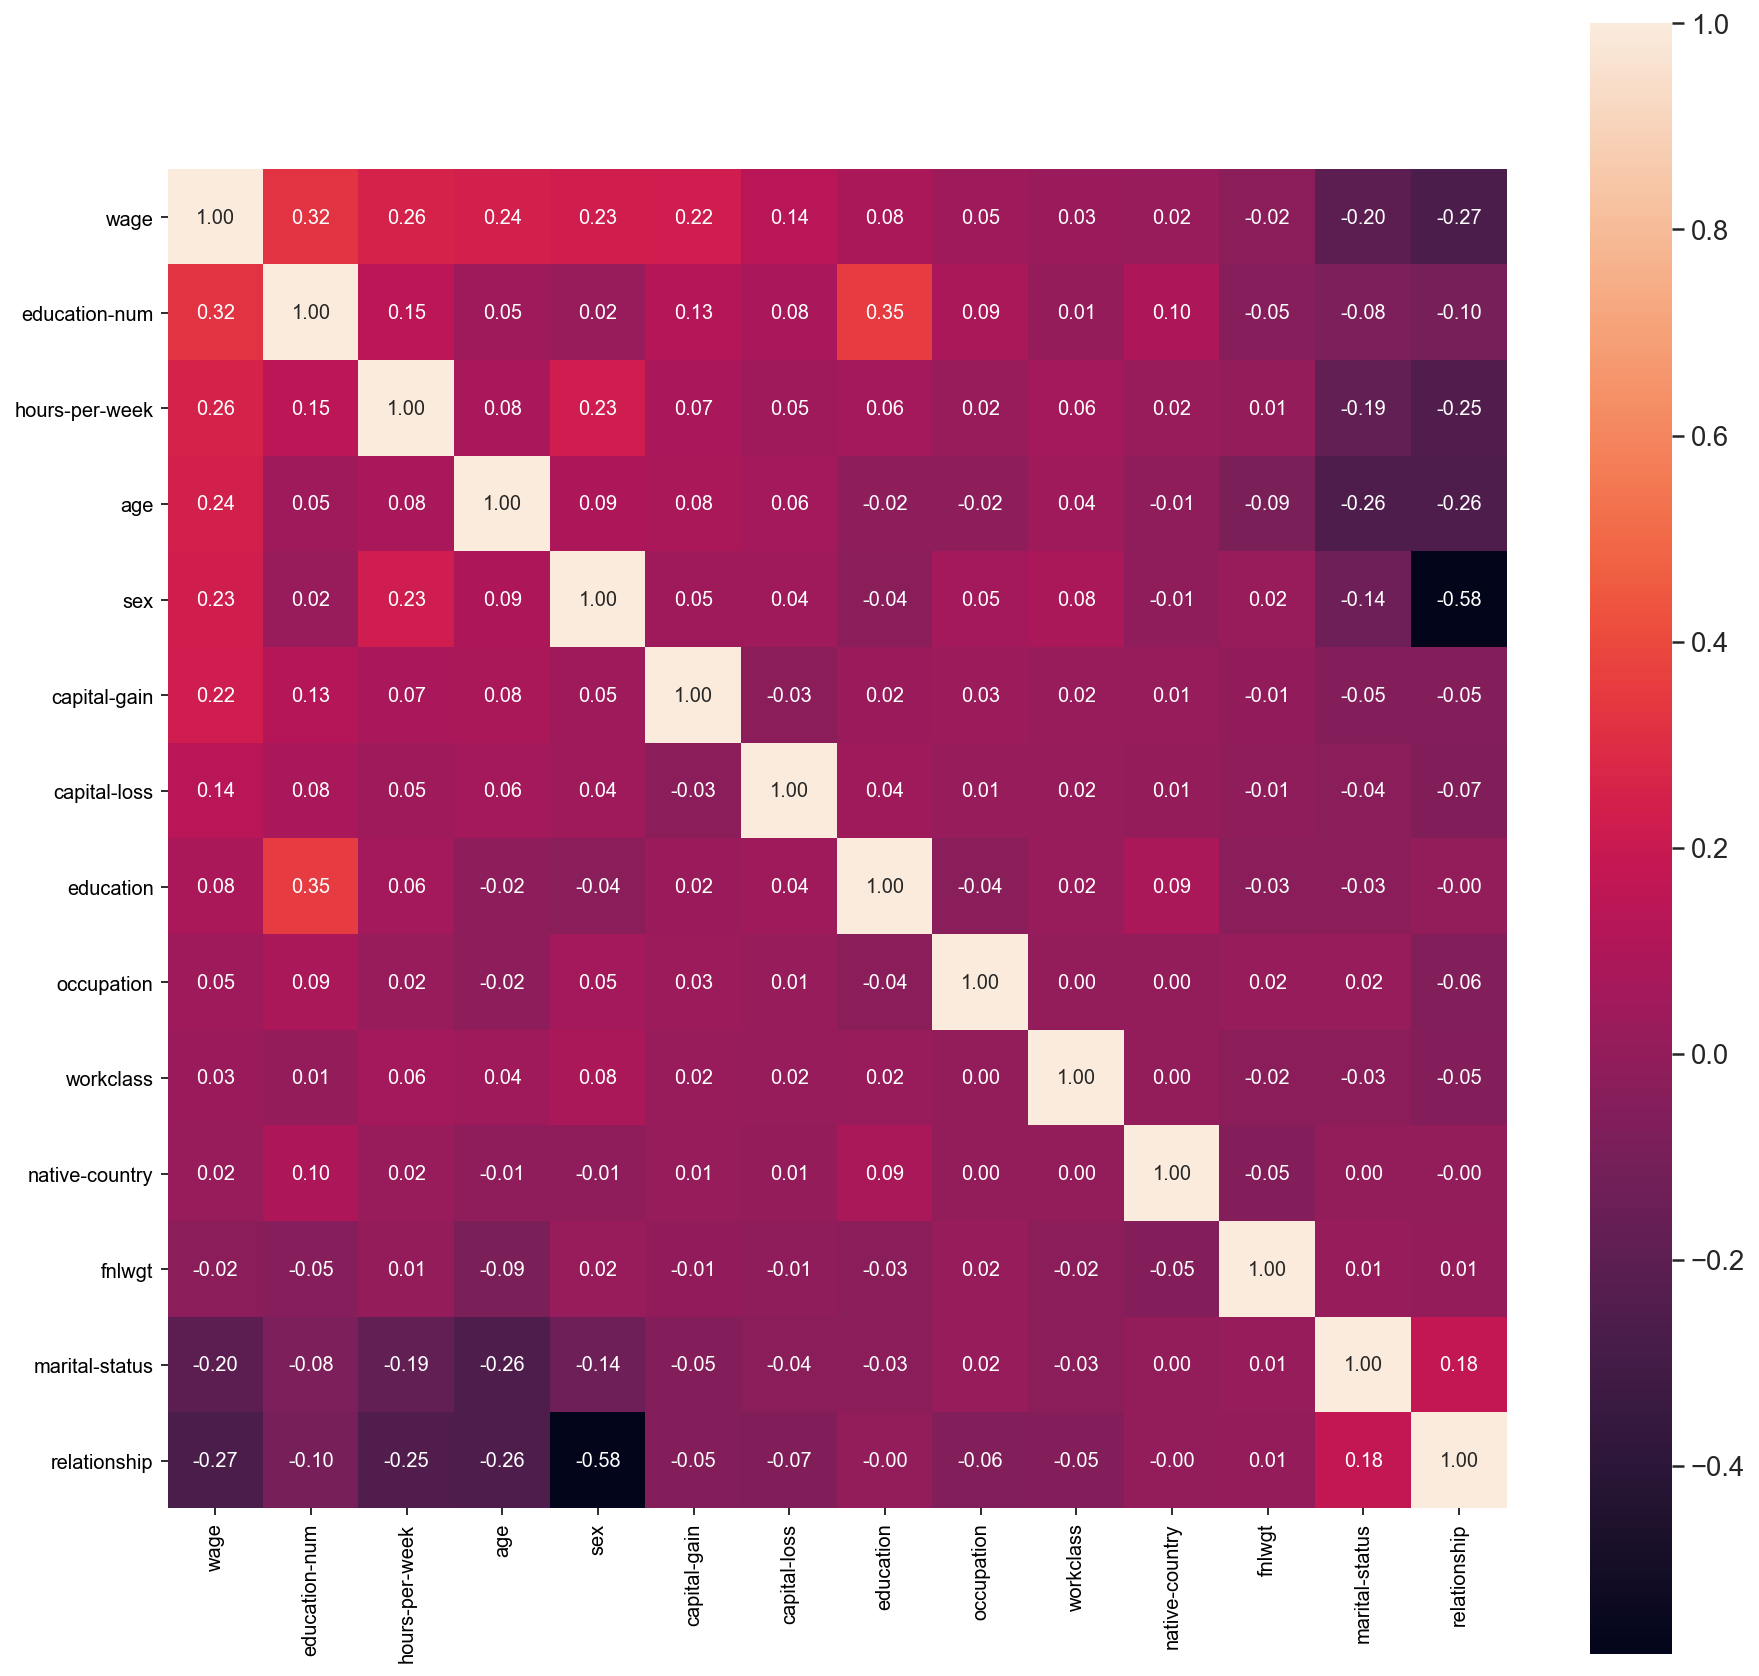

In [30]:
#wage correlation matrix
fix, ax = plt.subplots(figsize=(15,15))

corrmat = df.corr()
k = 14#number of variables for heatmap
cols = corrmat.nlargest(k, 'wage')['wage'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Feature Engineering

We need to create some additional columns because all correlations are generally low

In [31]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'wage'],
      dtype='object')

In [32]:
features = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country']

X = df[features]
y = df['wage']

In [33]:
poly = PolynomialFeatures(include_bias = False)
X_poly = poly.fit_transform(X)

df = pd.DataFrame(data = X_poly, columns = poly.get_feature_names(features))
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,...,capital-gain^2,capital-gain capital-loss,capital-gain hours-per-week,capital-gain native-country,capital-loss^2,capital-loss hours-per-week,capital-loss native-country,hours-per-week^2,hours-per-week native-country,native-country^2
0,56.0,3.0,346033.0,6.0,5.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,1480.0,1369.0
1,28.0,3.0,96226.0,11.0,9.0,2.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025.0,1665.0,1369.0
2,33.0,3.0,251120.0,9.0,13.0,2.0,11.0,0.0,1.0,7688.0,...,59105344.0,0.0,384400.0,284456.0,0.0,0.0,0.0,2500.0,1850.0,1369.0
3,26.0,3.0,178140.0,9.0,13.0,2.0,7.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025.0,1665.0,1369.0
4,40.0,0.0,56795.0,12.0,14.0,4.0,3.0,1.0,0.0,14084.0,...,198359056.0,0.0,774620.0,521108.0,0.0,0.0,0.0,3025.0,2035.0,1369.0


Let's check out the correlations now with wage:

In [34]:
#add wage back in
df['wage'] = y

In [35]:
df.corr()['wage'].sort_values(ascending = False)

wage                            1.000000
age education-num               0.392417
education-num hours-per-week    0.385600
age hours-per-week              0.347801
education-num^2                 0.344827
                                  ...   
relationship native-country    -0.263977
relationship                   -0.270220
marital-status^2               -0.278706
marital-status relationship    -0.279588
capital-gain capital-loss            NaN
Name: wage, Length: 105, dtype: float64

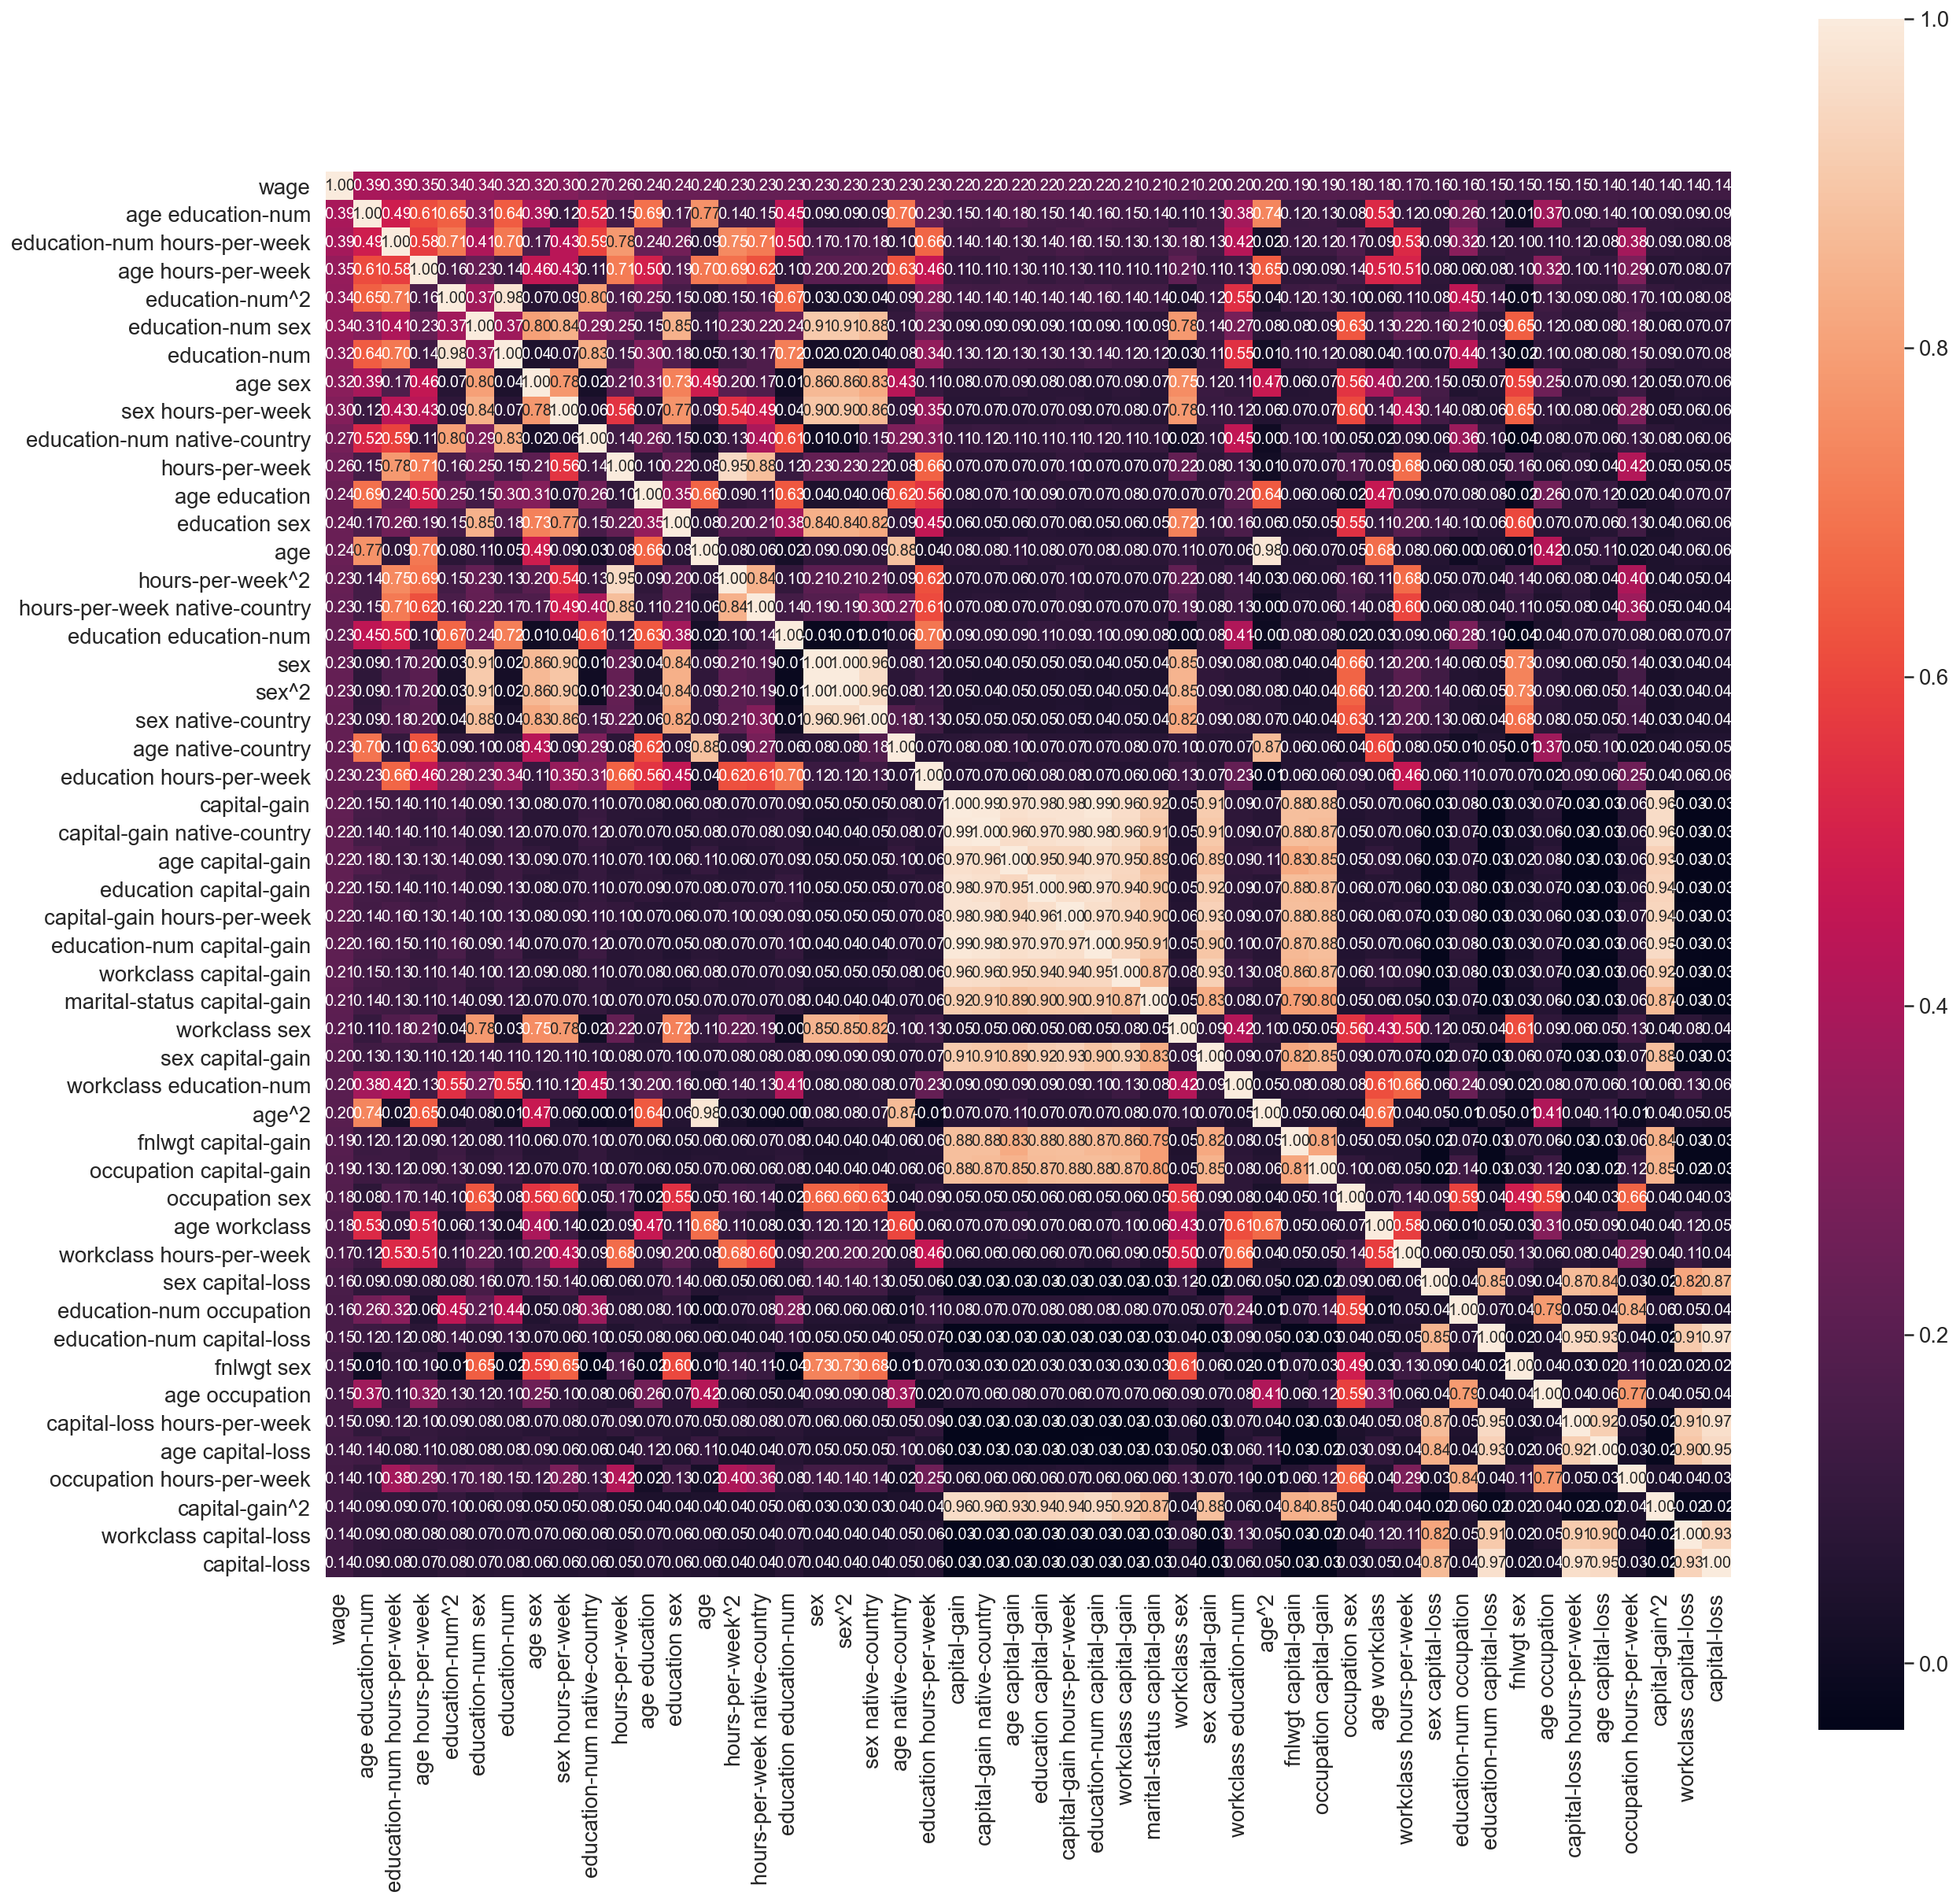

In [36]:
#wage correlation matrix including the polynomial features
fix, ax = plt.subplots(figsize=(20,20))

corrmat = df.corr()
k = 50#number of variables for heatmap
cols = corrmat.nlargest(k, 'wage')['wage'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Using the polynomial features, let's see if we can create any more columns:

In [37]:
df['educ_age_hours'] = df['age education-num'] * df['education-num hours-per-week']
df.corr()['wage'].sort_values(ascending = False)

wage                            1.000000
educ_age_hours                  0.453590
age education-num               0.392417
education-num hours-per-week    0.385600
age hours-per-week              0.347801
                                  ...   
relationship native-country    -0.263977
relationship                   -0.270220
marital-status^2               -0.278706
marital-status relationship    -0.279588
capital-gain capital-loss            NaN
Name: wage, Length: 106, dtype: float64

### Modelling: Training and Validation

In [38]:
#set features and target variables

X = df.drop(['wage'], axis = 1)

y = df['wage']

In [39]:
#train test split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Our baseline estimator is:

In [40]:
y_valid.value_counts(normalize = True)

0    0.759018
1    0.240982
Name: wage, dtype: float64

Let's train 4 models using Gridsearch for hyperparameter tuning:

### Logistic Regression

In [41]:
pipe_lr = Pipeline([('sc', StandardScaler()),
                       ('pca', PCA(random_state = 42)),
                       ('lr', LogisticRegression())])

params_lr = {
    'pca__n_components': range(1, 201, 10),
    'lr__penalty':      ['l2', 'l1'],
    'lr__C':            [.5, .01, 1],
    'lr__random_state': [42]
}

gs_lr = GridSearchCV(pipe_lr, 
                        param_grid=params_lr,
                        cv=5,
                        n_jobs=2,
                        verbose=1)

gs_lr.fit(X_train, y_train)

print(f'GridSearch Best Params: {gs_lr.best_params_}')
print('Train Score:', gs_lr.score(X_train, y_train))
print('Validation Score:', gs_lr.score(X_valid, y_valid))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   13.7s
[Parallel(n_jobs=2)]: Done 300 tasks      | elapsed:   38.5s
[Parallel(n_jobs=2)]: Done 600 out of 600 | elapsed:  1.1min finished


GridSearch Best Params: {'lr__C': 1, 'lr__penalty': 'l2', 'lr__random_state': 42, 'pca__n_components': 91}
Train Score: 0.8485604606525912
Validation Score: 0.8411358403683806


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### KNN

In [46]:
pipe_knn = Pipeline([('sc', StandardScaler()),
                     ('pca', PCA(random_state = 42)),
                     ('knn', KNeighborsClassifier())])

params_knn = {
    'pca__n_components': range(1, 201, 10),
    'knn__n_neighbors': range(1, 50, 5)
}

gs_knn = GridSearchCV(pipe_knn,
                      param_grid=params_knn,
                      cv=5,
                      n_jobs=2,
                      verbose=1)

gs_knn.fit(X_train, y_train)

print(f'GridSearch Best Params: {gs_knn.best_params_}')
print('Train Score:', gs_knn.score(X_train, y_train))
print('Validation Score:', gs_knn.score(X_valid, y_valid))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   22.1s
[Parallel(n_jobs=2)]: Done 248 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 616 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:  6.5min finished


GridSearch Best Params: {'knn__n_neighbors': 16, 'pca__n_components': 71}
Train Score: 0.8460652591170825
Validation Score: 0.8181120491174213


### RandomForest

In [50]:
pipe_rf = Pipeline([('sc', StandardScaler()),
                    ('pca', PCA(random_state = 42)),
                    ('rf', RandomForestClassifier(random_state = 42))])

params_rf = {'pca__n_components': range(1, 201, 10),
             'rf__n_estimators': [25, 50, 100],
             'rf__criterion':    ['gini'],
             'rf__max_depth':    [3, 5]}

gs_rf = GridSearchCV(pipe_rf,
                     param_grid=params_rf,
                     cv=5,
                     n_jobs=2,
                     verbose=1)

gs_rf.fit(X_train, y_train)

print(f'GridSearch Best Params: {gs_rf.best_params_}')
print('Train Score:', gs_rf.score(X_train, y_train))
print('Validation Score:', gs_rf.score(X_valid, y_valid))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   16.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 528 tasks      | elapsed:  5.0min
[Parallel(n_jobs=2)]: Done 600 out of 600 | elapsed:  5.0min finished


GridSearch Best Params: {'pca__n_components': 21, 'rf__criterion': 'gini', 'rf__max_depth': 5, 'rf__n_estimators': 50}
Train Score: 0.8472168905950096
Validation Score: 0.8234842670759785


### SVM

In [96]:
pipe_svm = Pipeline([('sc', StandardScaler()),
                     ('pca', PCA(random_state = 42)),
                     ('svm', SVC())
])

params_svm={'pca__n_components': range(1, 75, 10),
            'svm__C': [2,2.5,3,4], #reducing C will reduce the overfit
            'svm__probability': [True]
}

gs_svm = GridSearchCV(pipe_svm,
                      param_grid=params_svm,
                      cv=5,
                      verbose = 1)

gs_svm.fit(X_train, y_train)

print(f'GridSearch Best Params: {gs_svm.best_params_}')
print('Train Score:', gs_svm.score(X_train, y_train))
print('Validation Score:', gs_svm.score(X_valid, y_valid))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 13.5min finished


GridSearch Best Params: {'pca__n_components': 11, 'svm__C': 2, 'svm__probability': True}
Train Score: 0.8610364683301344
Validation Score: 0.8319263238679969


### Classification Metrics

Create a function for confusion matrix metrics:

In [155]:
def conf_matrix_metrics(model, X_valid, y_valid):
    y_hat = model.predict(X_valid) 
    cm = confusion_matrix(y_valid, y_hat)  
    tn, fp, fn, tp = cm.ravel()           
    
    #calculate metrics 
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    sensitivity = tp / (tp + fn) #aka recall
    specificity = tn/ (tn + fp)
    precision = tp /(tp + fp)
    f1_score = 2*((precision*sensitivity)/(precision+sensitivity))
    
    return {'accuracy': np.round(accuracy,3),
            'sensitivity': np.round(sensitivity,3),
            'specificity': np.round(specificity,3),
            'precision': np.round(precision,3), 
            'f1 score': np.round(f1_score, 3)}

Create a function for ROC curves:

In [60]:
import sklearn.metrics as metrics

def roc_curve(model, X_valid, y_valid):
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_valid)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_valid, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Logistic Regression:

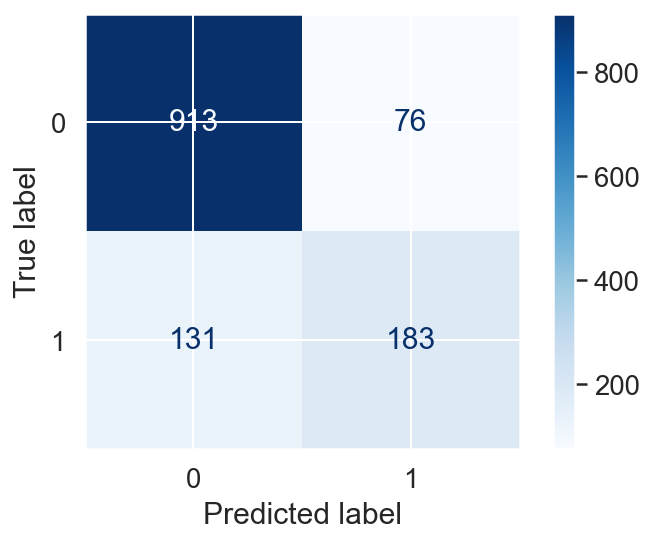

In [101]:
from sklearn.metrics import plot_confusion_matrix
#let's create an image for the confusion matrix
plot_confusion_matrix(gs_lr, X_valid, y_valid, cmap = 'Blues', values_format = '.3g')

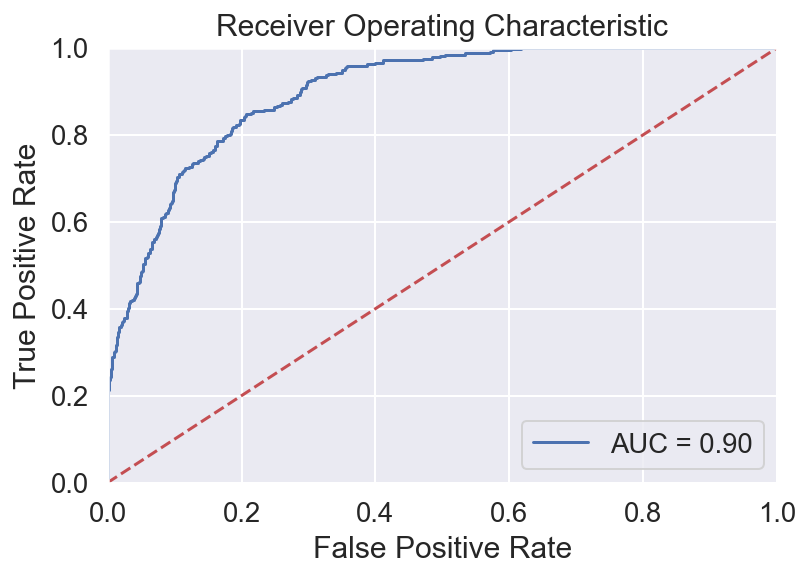

In [102]:
#ROC curve
roc_curve(gs_lr, X_valid, y_valid)

In [156]:
#metrics
conf_matrix_metrics(gs_lr, X_valid, y_valid)

{'accuracy': 0.841,
 'sensitivity': 0.583,
 'specificity': 0.923,
 'precision': 0.707,
 'f1 score': 0.639}

KNN:

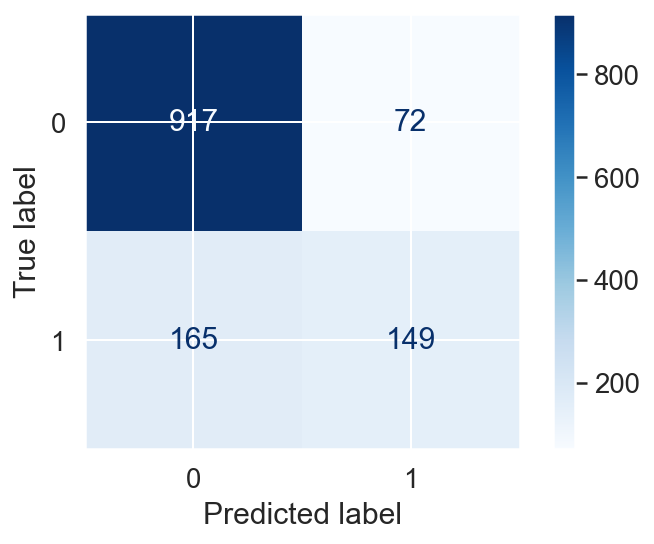

In [103]:
#let's create an image for the confusion matrix
plot_confusion_matrix(gs_knn, X_valid, y_valid, cmap = 'Blues', values_format = '.3g')

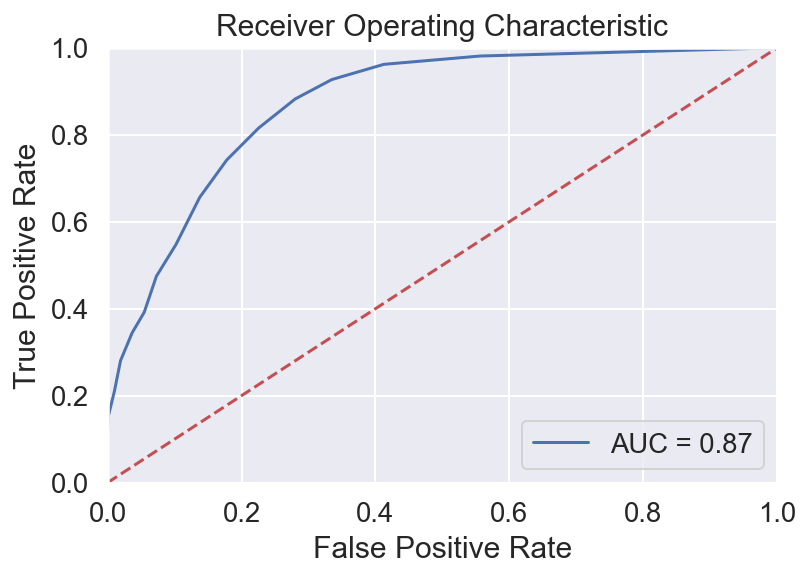

In [104]:
#ROC curve
roc_curve(gs_knn, X_valid, y_valid)

In [157]:
#metrics
conf_matrix_metrics(gs_knn, X_valid, y_valid)

{'accuracy': 0.818,
 'sensitivity': 0.475,
 'specificity': 0.927,
 'precision': 0.674,
 'f1 score': 0.557}

Random Forest:

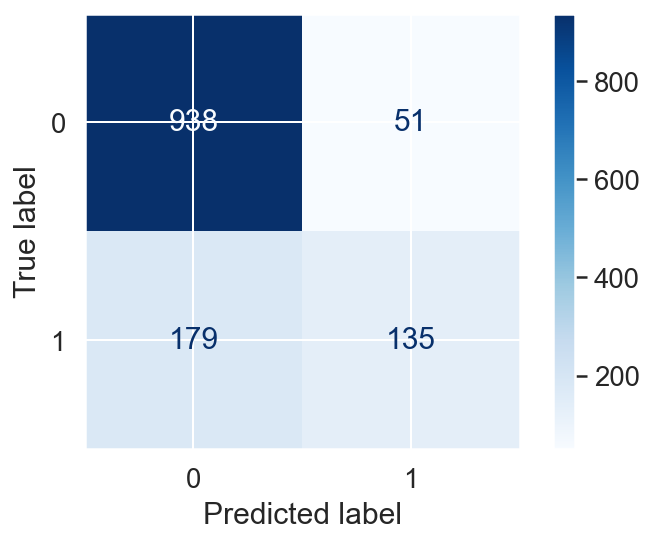

In [105]:
#let's create an image for the confusion matrix
plot_confusion_matrix(gs_rf, X_valid, y_valid, cmap = 'Blues', values_format = '.3g')

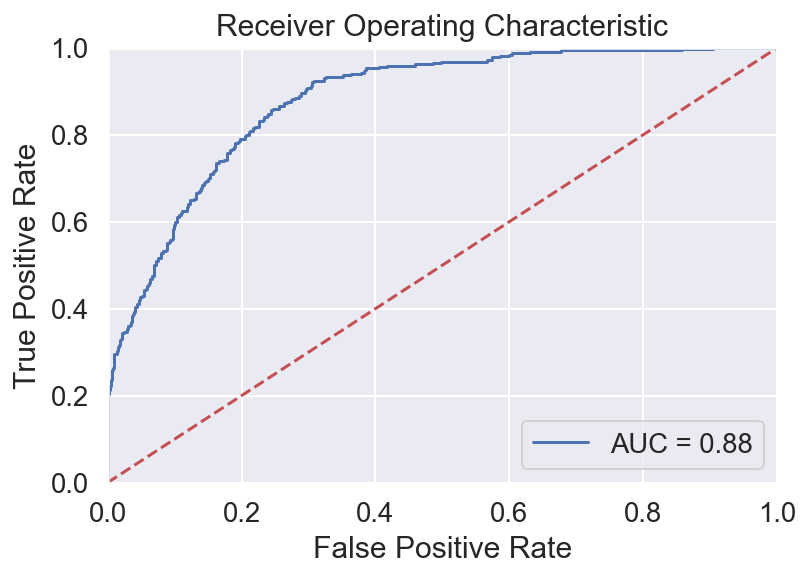

In [106]:
#ROC curve
roc_curve(gs_rf, X_valid, y_valid)

In [158]:
#metrics
conf_matrix_metrics(gs_rf, X_valid, y_valid)

{'accuracy': 0.823,
 'sensitivity': 0.43,
 'specificity': 0.948,
 'precision': 0.726,
 'f1 score': 0.54}

SVM:

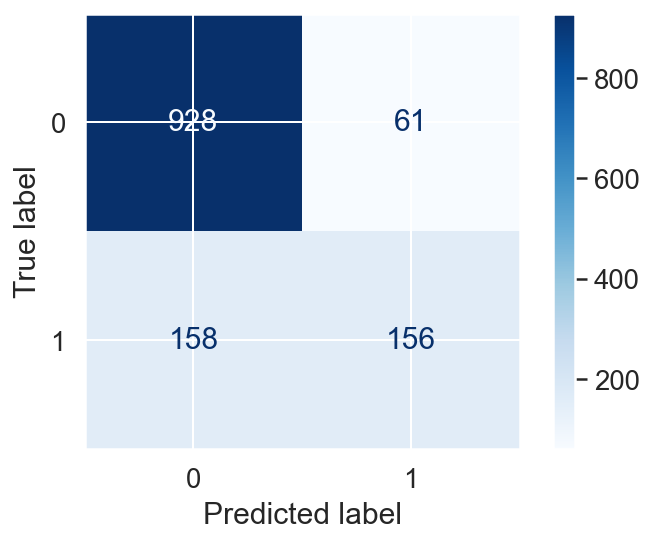

In [107]:
#let's create an image for the confusion matrix
plot_confusion_matrix(gs_svm, X_valid, y_valid, cmap = 'Blues', values_format = '.3g')

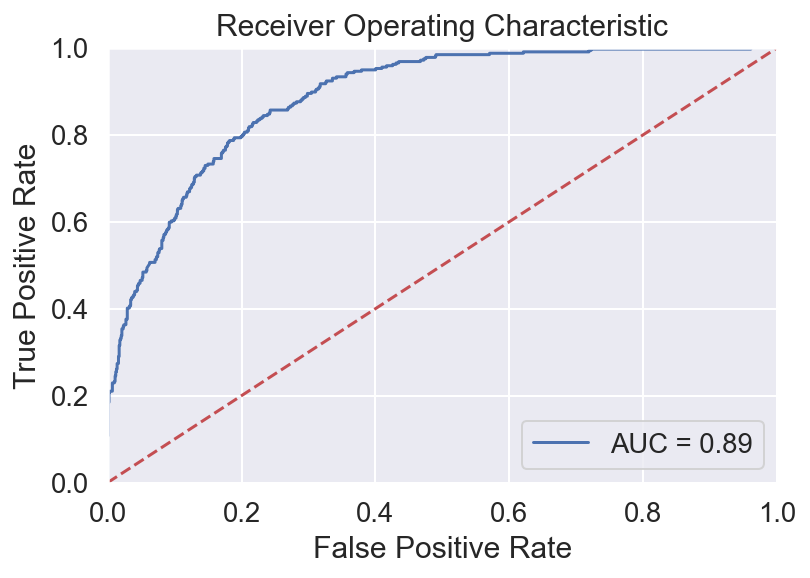

In [108]:
#ROC curve
roc_curve(gs_svm, X_valid, y_valid)

In [159]:
#metrics
conf_matrix_metrics(gs_svm, X_valid, y_valid)

{'accuracy': 0.832,
 'sensitivity': 0.497,
 'specificity': 0.938,
 'precision': 0.719,
 'f1 score': 0.588}

Compare the Model scores:

In [111]:
#plot of all of the scores for the models
col_names = ['Model', 'Accuracy Score on Training Data','Accuracy Score on Validation Data']
col_vals = [['Logistic Regression', gs_lr.score(X_train, y_train), gs_lr.score(X_valid, y_valid)],
           ['KNN', gs_knn.score(X_train, y_train), gs_knn.score(X_valid, y_valid)],
           ['Random Forest', gs_rf.score(X_train, y_train), gs_rf.score(X_valid, y_valid)],
           ['SVM', gs_svm.score(X_train, y_train), gs_svm.score(X_valid, y_valid)]]

model_df = pd.DataFrame(col_vals, columns = col_names)

In [113]:
model_df.columns

Index(['Model', 'Accuracy Score on Training Data',
       'Accuracy Score on Validation Data'],
      dtype='object')

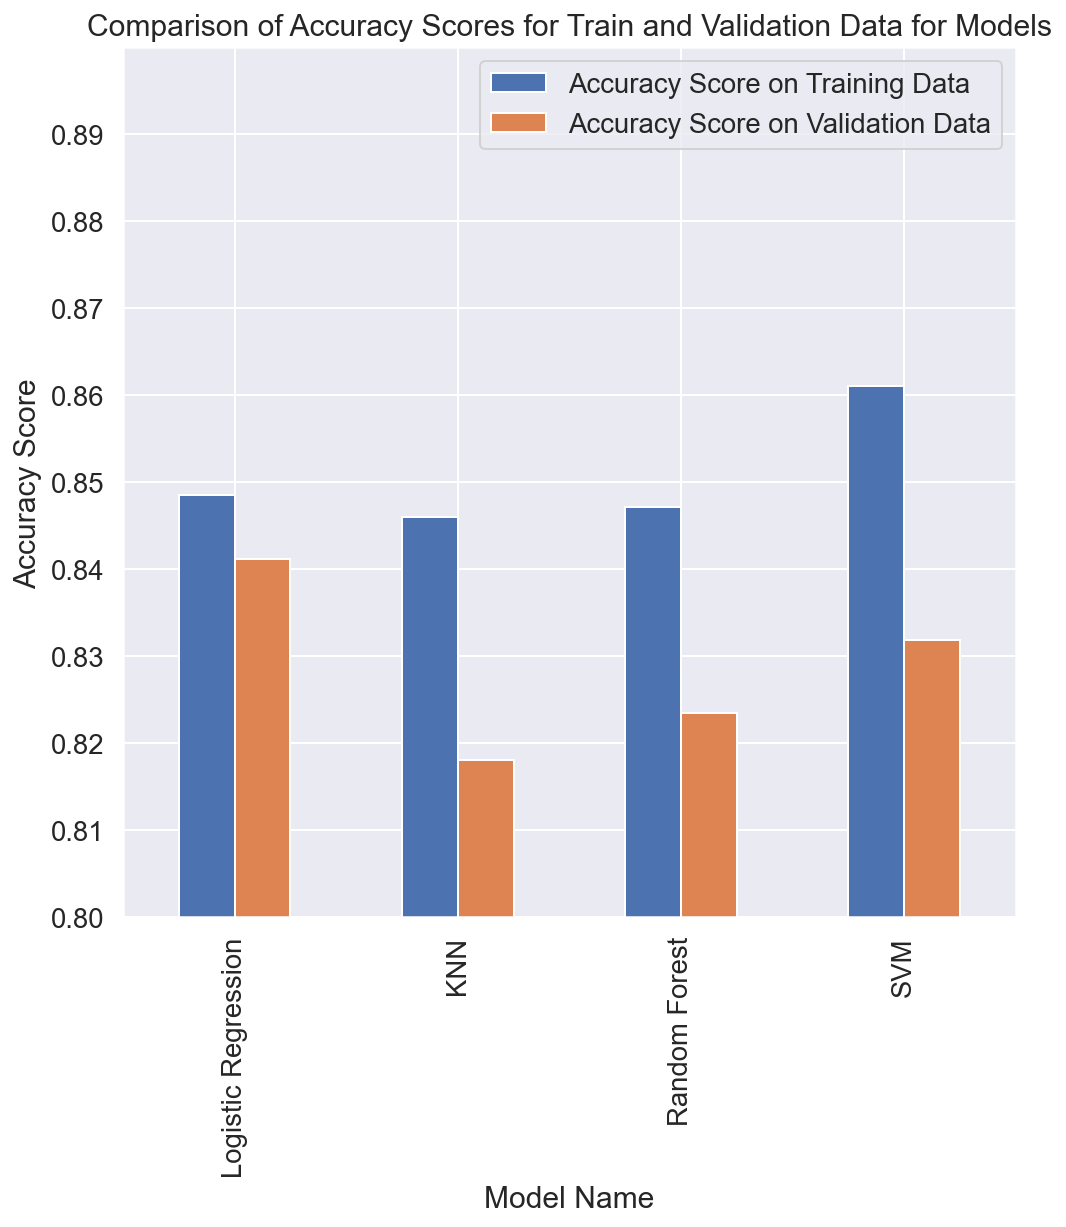

In [114]:
model_df.plot(x = 'Model', y = ['Accuracy Score on Training Data','Accuracy Score on Validation Data'], kind ='bar', figsize = (8,8))
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score')
plt.yticks(np.arange(0.80, 0.9, 0.01))
plt.ylim(0.80, 0.9)
plt.title('Comparison of Accuracy Scores for Train and Validation Data for Models')
plt.legend((model_df.columns[1], model_df.columns[2]))
plt.show()

In this experiment, we got the best results with Logistic Regression classification - let's move forward with Logistic Regression since the accuracy scores were highest ( approx 0.84), f1 score was highest (approx. 0.639) and the AUROC was 0.90.

Let's test our Logistic Regression classification model on our testing set:

### Modelling - Testing

In [115]:
test = pd.read_csv('./datasets/test_data.csv')

In [116]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States


In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   sex             16281 non-null  object
 9   capital-gain    16281 non-null  int64 
 10  capital-loss    16281 non-null  int64 
 11  hours-per-week  16281 non-null  int64 
 12  native-country  16281 non-null  object
dtypes: int64(6), object(7)
memory usage: 1.6+ MB


In [118]:
test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [119]:
test['workclass'].value_counts()

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64

In [120]:
test['occupation'].value_counts()

 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales                1854
 Adm-clerical         1841
 Other-service        1628
 Machine-op-inspct    1020
 ?                     966
 Transport-moving      758
 Handlers-cleaners     702
 Tech-support          518
 Farming-fishing       496
 Protective-serv       334
 Priv-house-serv        93
 Armed-Forces            6
Name: occupation, dtype: int64

In [121]:
test['native-country'].value_counts()

 United-States                 14662
 Mexico                          308
 ?                               274
 Philippines                      97
 Puerto-Rico                      70
 Germany                          69
 Canada                           61
 India                            51
 El-Salvador                      49
 China                            47
 Cuba                             43
 England                          37
 South                            35
 Dominican-Republic               33
 Italy                            32
 Haiti                            31
 Portugal                         30
 Japan                            30
 Poland                           27
 Columbia                         26
 Jamaica                          25
 Guatemala                        24
 Greece                           20
 Vietnam                          19
 Ecuador                          17
 Iran                             16
 Nicaragua                        15
 

In [122]:
#replace all of '?' in the columns
for col in ['workclass', 'occupation', 'native-country']:
    test[col].replace(' ?', test[col].mode()[0], inplace = True)
    
#loop to convert categorical to label or hot encoding
for i in test:
    if test[i].dtype == 'object':
        if test[i].value_counts == 2:
            hot_encoding(test, i)
        else:
            label_encoding(test, i)

In [123]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,1,7,4,6,3,1,0,0,40,37
1,38,3,89814,11,9,2,4,0,1,0,0,50,37
2,28,1,336951,7,12,2,10,0,1,0,0,40,37
3,44,3,160323,15,10,2,6,0,1,7688,0,40,37
4,18,3,103497,15,10,4,9,3,0,0,0,30,37


In [124]:
features_test = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country']

X_test = test[features]

In [125]:
X_test_poly = poly.fit_transform(X_test)

test = pd.DataFrame(data = X_test_poly, columns = poly.get_feature_names(features_test))
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,...,capital-gain^2,capital-gain capital-loss,capital-gain hours-per-week,capital-gain native-country,capital-loss^2,capital-loss hours-per-week,capital-loss native-country,hours-per-week^2,hours-per-week native-country,native-country^2
0,25.0,3.0,226802.0,1.0,7.0,4.0,6.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,1480.0,1369.0
1,38.0,3.0,89814.0,11.0,9.0,2.0,4.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0,1850.0,1369.0
2,28.0,1.0,336951.0,7.0,12.0,2.0,10.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,1480.0,1369.0
3,44.0,3.0,160323.0,15.0,10.0,2.0,6.0,0.0,1.0,7688.0,...,59105344.0,0.0,307520.0,284456.0,0.0,0.0,0.0,1600.0,1480.0,1369.0
4,18.0,3.0,103497.0,15.0,10.0,4.0,9.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,1110.0,1369.0


In [127]:
test['educ_age_hours'] = test['age education-num'] * test['education-num hours-per-week']

In [128]:
test.shape

(16281, 105)

In [129]:
df.shape

(6513, 106)

In [140]:
#set features for the test dataset

features = [i for i in test.columns]

X_test = test[features]

In [160]:
#predicted probabilities using our Logisitic Regression model
predictions_final = gs_lr.predict_proba(X_test)

### Submission

In [162]:
#add to original test dataframe
test['wage'] = predictions_final

In [163]:
#create new dataframe for submission
submission = test.loc[:, ['wage']]

In [164]:
#export
submission.to_csv('./datasets/submission.csv', sep = ',', index = False)

## Conclusion and Recommendations

 - We were able to develop an accurate Logistic Regression model that predicts the wage for individuals from the Census dataset.
 - The Logistic Regression model preformed the best out of all models that were tested; it returned the highest and most consistent accuracy score of 0.848 and 0.841 for training and validation respectively, highest f1 score of 0.639, and an AUROC score of 0.9.
 - Some of the variables that are a good predictor of wage is the education, hours worked per week, and age